# 2D Classification with a Single Neuron

We'll implement a script to classify 2D data using a single neuron.

## Load Data

We implement the function `load_data()` ...

In [1]:
def load_data(filename):
    import csv
    from numpy import asarray, reshape
    
    with open(filename) as f:
        reader = csv.reader(f)
        header = next(reader)
        data = []
        for row in reader:
            data.append(row)
        data = asarray(data).astype(float)

    x = data[:, 0:-1] # input data

    num_samples = data.shape[0]
    y = reshape(data[:, -1], (num_samples, 1)) # output data/targets/groundtruth
    
    return (x, y)

... and use it to load the data.

In [2]:
(x, y_gt) = load_data(filename="data_class_1d_clean.csv")

print("x:", x)
print("y_gt:", y_gt)

x: [ 0.69890926 -0.66948353 -1.26176998 -0.39901233 -0.06169857 -0.55097679
 -1.48984407 -0.07923319  0.9727084   0.43455583]
y_gt: [1. 0. 0. 0. 1. 0. 0. 1. 1. 1.]


## Visualize Data

We implement the function `plot_data_1d()` and save it in `plotting.py`.

```python
def plot_data_1d(x, y_gt):
    import matplotlib.pyplot as plt

    plt.scatter(x, y_gt, s=20, c="k")
    plt.axis("equal")
    plt.xlabel("x0", fontsize=24)
    plt.ylabel("y", fontsize=24)
    plt.tick_params(axis="both", which="major", labelsize=16)
    plt.show()
```

We now use this function to visualize the data.


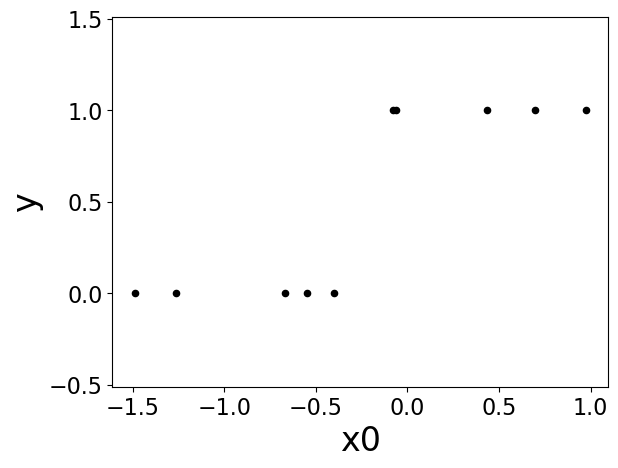

In [4]:
from plotting import plot_data_1d

plot_data_1d(x, y_gt)

## Neuron

We now create a single neuron and randomly initialize it.

In [6]:
from numpy.random import default_rng

rng = default_rng()
w0 = rng.standard_normal()

def neuron(w0, x):
    return (w0 * x > 0).astype(int)

y_p = neuron(w0, x)

We now plot its predictions using the function `plot_pred_1d`, which we also add to `plotting.py`.

```python
def plot_pred_1d(x, y_gt, y_p):
    import matplotlib.pyplot as plt

    plt.scatter(x, y_gt, s=20, c="k", label="ground truth")
    plt.scatter(x, y_p, s=100, c="tab:orange", marker="x", label="predicted")
    plt.legend(fontsize=20)
    plt.axis("equal")
    plt.xlabel("x0", fontsize=24)
    plt.ylabel("y", fontsize=24)
    plt.tick_params(axis="both", which="major", labelsize=16)
    plt.show()
``````


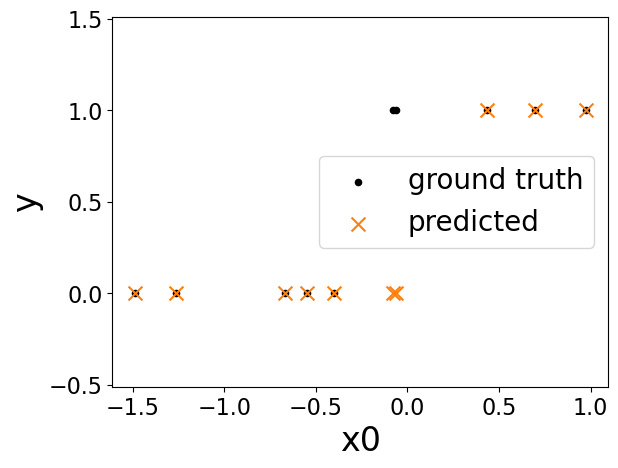

In [10]:
from plotting import plot_pred_1d

plot_pred_1d(x, y_gt, y_p)

## Training

We now train the neuron...

In [ ]:
num_samples = len(x)
num_train_iterations = 100
eta = .1 # learning rate

for i in range(num_train_iterations):
    selected = rng.integers(0, num_samples) # select random sample
    x0_selected = x[selected]
    y_gt_selected = y_gt[selected]

    y_p = neuron(w0, x0_selected) # neuron prediction

    error = y_p_selected - y_gt_selected # calculate error
    # update weights
    w0 -= eta * error * x0_selected
 print(f"iteration {i}\t w0 = {w0:.2f}\t error = {error:.2f}")